# Stock Market Prediction And Forecasting Using Stacked LSTM

For this project Apple last 5 years financial stock data till present is used to predict future stock "close" values. Future prediction for the next 30 days is also done to test the model robustness.
For the usage of this code the libraries Keras and Tensorflow must be >2.0

### Data Collection & Visualization

Data is taken from tiingo website by first making an API key and using it to extract any organization stocks. In this case Apple Company stocks are taken as the data. The data is stored in a csv file first as only 50 requests are executed at a time. 

In [1]:
import pandas_datareader as pdr
key="08264c6d2781eda204ff1bddf4487f432d400099"

In [2]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [3]:
# Since for the first time 
df.to_csv('AAPL.csv')

In [4]:
import pandas as pd

In [51]:
# To convert the data into a dataframe
df=pd.read_csv('AAPL.csv')

In [6]:
# To visualize the first 5 records of the data
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-07-31 00:00:00+00:00,148.73,150.33,148.13,149.90,19422655,35.193025,35.571623,35.051051,35.469875,77690620,0.0,1.0
1,AAPL,2017-08-01 00:00:00+00:00,150.05,150.22,148.41,149.10,24725526,35.505368,35.545594,35.117306,35.280576,98902104,0.0,1.0
2,AAPL,2017-08-02 00:00:00+00:00,157.14,159.75,156.16,159.28,69222793,37.183030,37.800617,36.951138,37.689404,276891172,0.0,1.0
3,AAPL,2017-08-03 00:00:00+00:00,155.57,157.21,155.02,157.05,26000738,36.811530,37.199593,36.681388,37.161733,104002952,0.0,1.0
4,AAPL,2017-08-04 00:00:00+00:00,156.39,157.40,155.69,156.07,20349532,37.005562,37.244552,36.839925,36.929842,81398128,0.0,1.0


In [7]:
# To visualize the last records of the data
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2022-07-22 00:00:00+00:00,154.09,156.280,153.41,155.390,66675408,154.09,156.280,153.41,155.390,66675408,0.0,1.0
1254,AAPL,2022-07-25 00:00:00+00:00,152.95,155.040,152.28,154.010,53623945,152.95,155.040,152.28,154.010,53623945,0.0,1.0
1255,AAPL,2022-07-26 00:00:00+00:00,151.60,153.085,150.80,152.265,55138691,151.60,153.085,150.80,152.265,55138691,0.0,1.0
1256,AAPL,2022-07-27 00:00:00+00:00,156.79,157.330,152.16,152.580,78620688,156.79,157.330,152.16,152.580,78620688,0.0,1.0
1257,AAPL,2022-07-28 00:00:00+00:00,157.35,157.640,154.41,156.980,81378731,157.35,157.640,154.41,156.980,81378731,0.0,1.0


In [8]:
# As for the project the close column is being selected for the prediction
df1=df.reset_index()['close']

In [9]:
df1

0       148.73
1       150.05
2       157.14
3       155.57
4       156.39
         ...  
1253    154.09
1254    152.95
1255    151.60
1256    156.79
1257    157.35
Name: close, Length: 1258, dtype: float64

Graphical Representation for the "close" values for clear visualization:

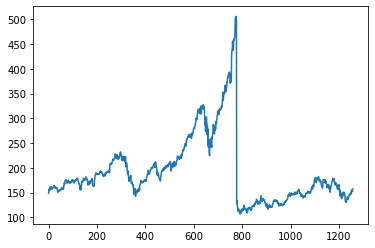

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

### Data Normalization

LSTM are sensitive to the scale of the data. so we apply MinMax scaler to Normalize the data between 0 and 1

In [12]:
import numpy as np

In [13]:
df1

0       148.73
1       150.05
2       157.14
3       155.57
4       156.39
         ...  
1253    154.09
1254    152.95
1255    151.60
1256    156.79
1257    157.35
Name: close, Length: 1258, dtype: float64

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
print(df1)

[[0.10492173]
 [0.10822793]
 [0.12598622]
 ...
 [0.11211021]
 [0.12510958]
 [0.12651221]]


### Splitting of Data

splitting dataset into train (65%) and test data (35%)

In [16]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:
training_size,test_size

(817, 441)

In [18]:
train_data

array([[1.04921728e-01],
       [1.08227927e-01],
       [1.25986224e-01],
       [1.22053851e-01],
       [1.24107702e-01],
       [1.30169067e-01],
       [1.33350031e-01],
       [1.35804629e-01],
       [1.21427677e-01],
       [1.26837821e-01],
       [1.32773951e-01],
       [1.37157170e-01],
       [1.35529117e-01],
       [1.27789606e-01],
       [1.26887915e-01],
       [1.26161553e-01],
       [1.32598622e-01],
       [1.33099562e-01],
       [1.31321227e-01],
       [1.32798998e-01],
       [1.36831559e-01],
       [1.40438322e-01],
       [1.41540388e-01],
       [1.43168441e-01],
       [1.43293676e-01],
       [1.38359424e-01],
       [1.37933626e-01],
       [1.36305573e-01],
       [1.29718222e-01],
       [1.36906700e-01],
       [1.35303694e-01],
       [1.32273012e-01],
       [1.28841578e-01],
       [1.32849092e-01],
       [1.29818410e-01],
       [1.29968691e-01],
       [1.23306199e-01],
       [1.16593613e-01],
       [1.12836569e-01],
       [1.09480276e-01],


### Data Pre-processing

In this part we are trying to split our data based on time step where the previous timestep data will be used to predict the last timestep data. For the use in this project 100 timesteps is used.

In [19]:
import numpy
# converting an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [20]:
# reshaping into e.g X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [22]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

Before passing the data into the stacked LSTM model, the model is need to be reshaped in 3-dimension which is a requirement for LSTM. Hence reshape input to be [samples, time steps, features]

In [23]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

### The stacked LSTM Model

The model is created by using 3 LSTM layers having 50 neurons each by giving the first layer the input shape and putting the returen_sequence parameter to True as the output of one layer will be passed to the next.

Laslty a dense layer consisting of only 1 neuron is used since we require only 1 value using all the previous 100 timesteps data values. The Mean Squared Error is used as the evaluation metric and Adam is used as the optimizer. The model summary can also be seen below:

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


The model is trained for 100 epochs with a batch size of 64 and the test data is used for validation purpose.

In [28]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Train on 716 samples, validate on 340 samples
Epoch 1/100
716/716 [==============================] - 31s 43ms/sample - loss: 0.0435 - val_loss: 0.0016
Epoch 2/100
716/716 [==============================] - 8s 11ms/sample - loss: 0.0188 - val_loss: 0.0111
Epoch 3/100
716/716 [==============================] - 8s 11ms/sample - loss: 0.0131 - val_loss: 0.0013
Epoch 4/100
716/716 [==============================] - 7s 10ms/sample - loss: 0.0105 - val_loss: 9.7148e-04
Epoch 5/100
716/716 [==============================] - 9s 12ms/sample - loss: 0.0090 - val_loss: 4.3028e-04
Epoch 6/100
716/716 [==============================] - 7s 10ms/sample - loss: 0.0083 - val_loss: 0.0014
Epoch 7/100
716/716 [==============================] - 7s 10ms/sample - loss: 0.0079 - val_loss: 5.6306e-04
Epoch 8/100
716/716 [==============================] - 7s 10ms/sample - loss: 0.0066 - val_loss: 8.0604e-04
Epoch 9/100
716/716 [==============================] - 7s 10ms/sample - loss: 0.0061 - val_loss: 2.8404e-

716/716 [==============================] - 7s 10ms/sample - loss: 0.0015 - val_loss: 1.8794e-04
Epoch 77/100
716/716 [==============================] - 7s 10ms/sample - loss: 0.0014 - val_loss: 1.9242e-04
Epoch 78/100
716/716 [==============================] - 7s 10ms/sample - loss: 0.0013 - val_loss: 1.9447e-04
Epoch 79/100
716/716 [==============================] - 7s 10ms/sample - loss: 0.0013 - val_loss: 2.0995e-04
Epoch 80/100
716/716 [==============================] - 7s 10ms/sample - loss: 0.0013 - val_loss: 2.1307e-04
Epoch 81/100
716/716 [==============================] - 7s 10ms/sample - loss: 0.0017 - val_loss: 2.0941e-04
Epoch 82/100
716/716 [==============================] - 7s 10ms/sample - loss: 0.0013 - val_loss: 1.8921e-04
Epoch 83/100
716/716 [==============================] - 7s 10ms/sample - loss: 0.0016 - val_loss: 1.9924e-04
Epoch 84/100
716/716 [==============================] - 7s 10ms/sample - loss: 0.0020 - val_loss: 2.0676e-04
Epoch 85/100
716/716 [==========

### Data Prediction

The data is predicted using our test data. Aafter the prediction the data is denormalized (back to its original state). The RMSE is calculated and the predicted data is visualized.

In [29]:
import tensorflow as tf

In [31]:
# The prediction
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [32]:
# Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [33]:
# Calculating RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

238.60011589258895

In [34]:
# Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

155.88550237835778

In the graph plotting the blue color line shows the whole dataset, while the orange and green color lines shows the training data and the predicted data respectively. As it can be depicted through the plot that model is able to predict the data much precisely, with a negligable variation to the original dataset values.

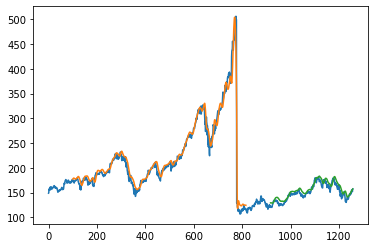

In [35]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### Prediction of next 30 days

For the next 30 days prediction we need atleast 100 timesteps data to predict the next 101th value and similarly repeating this process on and on until for the next 30 days. Hence initially, since our last test data consists of length 441 we would take our data to predict form the 341 positon.

In [36]:
len(test_data)

441

In [37]:
# taking data from test data from 341th postion
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [38]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [39]:
temp_input

[0.13139636819035688,
 0.1267376330619912,
 0.1405385097056981,
 0.12944270507201,
 0.11994990607388845,
 0.10965560425798371,
 0.12085159674389478,
 0.13212273011897302,
 0.13470256731371316,
 0.14311834690043823,
 0.14662492172824038,
 0.1552410770194113,
 0.1587226048841578,
 0.16839073262366933,
 0.17001878522229175,
 0.17222291797119593,
 0.18063869755792106,
 0.1776581089542893,
 0.16974326862867878,
 0.16899185973700687,
 0.1793362554790231,
 0.17087038196618654,
 0.16278021289918598,
 0.1635566687539135,
 0.158422041327489,
 0.14755165936130238,
 0.1523356293049467,
 0.15919849718221663,
 0.14639949906073885,
 0.1458484658735128,
 0.15168440826549778,
 0.15125860989355033,
 0.14922980588603624,
 0.13763306199123349,
 0.140363180964308,
 0.1251346274264245,
 0.12455854727614268,
 0.14226675015654344,
 0.12726361928616153,
 0.12804007514088916,
 0.13184721352536,
 0.14822792736380713,
 0.12505948653725735,
 0.12633688165309953,
 0.11326236693800873,
 0.11939887288666245,
 0.09933

In this logic we first create an empty array to store all prediction values and looping till 30 as for the 30 day prediction. For the 1st time it will always fall in this else condition. Then the reshape to 3D is always done before prediction. Moreover the predicted value is then stored in the output list array and added at the end of the list of the input data array which would in turn divert the loop towards the if condition where the list is shifted one element to the right to make the whole array consisting of 100 elements.

In [40]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:]) # 1 element towards right is shifted tomake the array of 100 elements
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0) # Prediction
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:           # For the 1st time it will always fall in this else condition
        x_input = x_input.reshape((1, n_steps,1)) # Reshaping to 3D format for LSTM
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist()) # Adding the predicted value to the input array as well as the output array
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.12937833]
101
1 day input [0.12673763 0.14053851 0.12944271 0.11994991 0.1096556  0.1208516
 0.13212273 0.13470257 0.14311835 0.14662492 0.15524108 0.1587226
 0.16839073 0.17001879 0.17222292 0.1806387  0.17765811 0.16974327
 0.16899186 0.17933626 0.17087038 0.16278021 0.16355667 0.15842204
 0.14755166 0.15233563 0.1591985  0.1463995  0.14584847 0.15168441
 0.15125861 0.14922981 0.13763306 0.14036318 0.12513463 0.12455855
 0.14226675 0.12726362 0.12804008 0.13184721 0.14822793 0.12505949
 0.12633688 0.11326237 0.11939887 0.09933626 0.08946775 0.10086412
 0.09693175 0.10619912 0.08510958 0.07641828 0.07701941 0.09084534
 0.08395742 0.08435817 0.09252348 0.107201   0.10519724 0.10487163
 0.11113338 0.096531   0.09843456 0.10487163 0.10299311 0.08966813
 0.07586725 0.0627176  0.06492173 0.07160927 0.05815905 0.06191609
 0.07271133 0.07140889 0.0787226  0.08721353 0.08721353 0.07664371
 0.08112711 0.07484033 0.0803757  0.08696306 0.09036944 0.09896055
 0.10068879 0.0952536  0.09773325 0

8 day output [[0.14784198]]
9 day input [0.14311835 0.14662492 0.15524108 0.1587226  0.16839073 0.17001879
 0.17222292 0.1806387  0.17765811 0.16974327 0.16899186 0.17933626
 0.17087038 0.16278021 0.16355667 0.15842204 0.14755166 0.15233563
 0.1591985  0.1463995  0.14584847 0.15168441 0.15125861 0.14922981
 0.13763306 0.14036318 0.12513463 0.12455855 0.14226675 0.12726362
 0.12804008 0.13184721 0.14822793 0.12505949 0.12633688 0.11326237
 0.11939887 0.09933626 0.08946775 0.10086412 0.09693175 0.10619912
 0.08510958 0.07641828 0.07701941 0.09084534 0.08395742 0.08435817
 0.09252348 0.107201   0.10519724 0.10487163 0.11113338 0.096531
 0.09843456 0.10487163 0.10299311 0.08966813 0.07586725 0.0627176
 0.06492173 0.07160927 0.05815905 0.06191609 0.07271133 0.07140889
 0.0787226  0.08721353 0.08721353 0.07664371 0.08112711 0.07484033
 0.0803757  0.08696306 0.09036944 0.09896055 0.10068879 0.0952536
 0.09773325 0.09680651 0.10427051 0.10852849 0.10076393 0.11060739
 0.11571697 0.12150282 0.1

16 day output [[0.16772479]]
17 day input [0.17765811 0.16974327 0.16899186 0.17933626 0.17087038 0.16278021
 0.16355667 0.15842204 0.14755166 0.15233563 0.1591985  0.1463995
 0.14584847 0.15168441 0.15125861 0.14922981 0.13763306 0.14036318
 0.12513463 0.12455855 0.14226675 0.12726362 0.12804008 0.13184721
 0.14822793 0.12505949 0.12633688 0.11326237 0.11939887 0.09933626
 0.08946775 0.10086412 0.09693175 0.10619912 0.08510958 0.07641828
 0.07701941 0.09084534 0.08395742 0.08435817 0.09252348 0.107201
 0.10519724 0.10487163 0.11113338 0.096531   0.09843456 0.10487163
 0.10299311 0.08966813 0.07586725 0.0627176  0.06492173 0.07160927
 0.05815905 0.06191609 0.07271133 0.07140889 0.0787226  0.08721353
 0.08721353 0.07664371 0.08112711 0.07484033 0.0803757  0.08696306
 0.09036944 0.09896055 0.10068879 0.0952536  0.09773325 0.09680651
 0.10427051 0.10852849 0.10076393 0.11060739 0.11571697 0.12150282
 0.1183469  0.11549155 0.11211021 0.12510958 0.12651221 0.12937833
 0.13138714 0.13354427 

25 day output [[0.19036265]]
26 day input [0.15233563 0.1591985  0.1463995  0.14584847 0.15168441 0.15125861
 0.14922981 0.13763306 0.14036318 0.12513463 0.12455855 0.14226675
 0.12726362 0.12804008 0.13184721 0.14822793 0.12505949 0.12633688
 0.11326237 0.11939887 0.09933626 0.08946775 0.10086412 0.09693175
 0.10619912 0.08510958 0.07641828 0.07701941 0.09084534 0.08395742
 0.08435817 0.09252348 0.107201   0.10519724 0.10487163 0.11113338
 0.096531   0.09843456 0.10487163 0.10299311 0.08966813 0.07586725
 0.0627176  0.06492173 0.07160927 0.05815905 0.06191609 0.07271133
 0.07140889 0.0787226  0.08721353 0.08721353 0.07664371 0.08112711
 0.07484033 0.0803757  0.08696306 0.09036944 0.09896055 0.10068879
 0.0952536  0.09773325 0.09680651 0.10427051 0.10852849 0.10076393
 0.11060739 0.11571697 0.12150282 0.1183469  0.11549155 0.11211021
 0.12510958 0.12651221 0.12937833 0.13138714 0.13354427 0.13581045
 0.13814977 0.14053625 0.14295302 0.14539023 0.14784198 0.15030487
 0.15277664 0.155255

The data is visualized by first considering the 2 arrays; one consisting of shape of out input data and the second consisting of our output data .

In [41]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [42]:
import matplotlib.pyplot as plt

In [43]:
len(df1)

1258

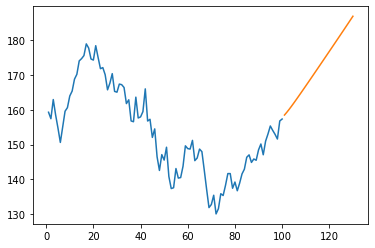

In [44]:
# Denormalization
plt.plot(day_new,scaler.inverse_transform(df1[1158:])) # since we have used the last 100 days timetep to predict the future 30
                                                       # days forecast. To plot the data of actual dataset we are considering 
                                                       # till only 1158
        
plt.plot(day_pred,scaler.inverse_transform(lst_output)) # our predictied output plot (In orange line)

To show a much smoother curve:

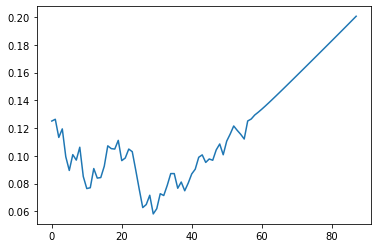

In [45]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

### Conclusion

According to the results shown the model is good predictor for short fututre periods but could be more improved by increasing the number of timesteps or by using a more complex model like bidirectional LSTM. The project took around 20 days to complete and the training took around 15 minutes for every run. 